In [8]:
import mat73
import numpy as np
import matplotlib.pyplot as plt

In [9]:
loadFrac = mat73.loadmat("../data/attractor-0.mat")
N_span = range(1,128,2)
M = 48

In [10]:
Fractions = np.array(loadFrac['Fractions'])
num_N, num_samp, num_init, _ = np.shape(Fractions)

In [11]:
# 0 diversity
# 1 chaos 
# 2 limit cycle
# 3 alt s s
diversity = np.mean(Fractions[:,:,:,0], axis=-1)
full = (diversity == 1.0).astype(float)
chaos = np.mean(Fractions[:,:,:,1], axis=-1)
limcyc = np.mean(Fractions[:,:,:,2], axis=-1)
altss = np.mean(Fractions[:,:,:,3], axis=-1)
gs = np.ones((num_N, num_samp)) - chaos - limcyc - altss
gsfull = full * gs
gspart = gs - gsfull

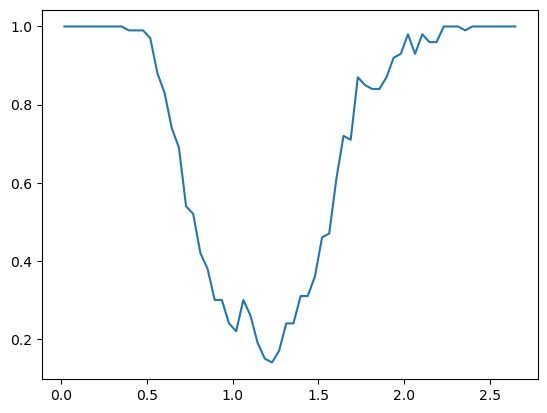

In [12]:
plt.plot(np.array(N_span)/M, np.mean(gs, axis= -1))

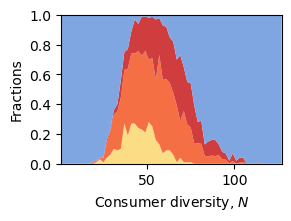

In [16]:
plt.figure(figsize=(2.8, 2.1),constrained_layout=True)
color_map = ["#FBDD85", "#F46F43", "#CF3D3E","#80A6E2"]
plt.stackplot(np.array(N_span),
              np.mean(gspart, axis= -1),
              np.mean(altss, axis= -1),
              np.mean(limcyc, axis= -1), 
              #np.mean(chaos, axis= -1),
              np.mean(gsfull, axis= -1),
              colors = color_map) #edgecolor='white', linewidth=1.5

#plt.plot([0.8**2 for i in range(11)],[0.1*i for i in range(11)],'--k')
#plt.plot([1/0.8**2 for i in range(11)],[0.1*i for i in range(11)],'--k')
plt.xlim(1,127)
plt.ylim(0,1)
plt.xlabel('Consumer diversity, $N$')
plt.ylabel('Fractions')
plt.savefig('../figures/basins-0.pdf')